Lending Club Loan Default Analysis by Manish Tyagi

The analysis is divided into four main parts:

1.Initial Data understanding
2.Data cleaning (cleaning missing values, removing redundant columns etc.)
3.Data Analysis
4.Recommendations

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#set printing options
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#load input file
loan_ip=pd.read_csv('/Users/priyankagharpure/Desktop/Manish/MS - ML:AI from IIIT&LJMU/Course 1 Statistics/Lending Case Study/New Dataset/loan.csv')
loan_ip.shape

/var/folders/j6/145g_05j1z514zqkz1rjjpwh0000gn/T/ipykernel_56857/2739457470.py:10: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_ip=pd.read_csv('/Users/priyankagharpure/Desktop/Manish/MS - ML:AI from IIIT&LJMU/Course 1 Statistics/Lending Case Study/New Dataset/loan.csv')


(39717, 111)

1. Initial Data Analysis

In [2]:
#analysing initial first few rows to see how data looks like
loan_ip.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [3]:
#checking column details 
loan_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
#checking column details 
loan_ip.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

2.Data Cleaning

In [5]:
#check null values % in each column
round(loan_ip.isnull().sum()/len(loan_ip.index), 2)*100


id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


In [6]:
#drop null value columns
loan_ip=loan_ip.dropna(axis=1,how='all')

In [54]:
#check null values % in each column after dropping columns 
round(loan_ip.isnull().sum()/len(loan_ip.index), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [7]:
#check column details after dropping columns with all null values 
loan_ip.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [8]:
#check column details after dropping columns with all null values 
loan_ip.shape

(39717, 57)

Now the dataframe has 57 columns 

In [10]:
#Columns mths_since_last_record and next_pymnt_d have more than 90% null values. hence dropping the two columns from the dataframe

loan_ip = loan_ip.drop(['mths_since_last_record','next_pymnt_d'], axis=1)

KeyError: "['mths_since_last_record', 'next_pymnt_d'] not found in axis"

In [25]:
#check null values % in each column after dropping columns 
round(loan_ip.isnull().sum()/len(loan_ip.index), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [11]:
#check column details after dropping columns with null values % above 90 
loan_ip.shape

(39717, 55)

Now the dataframe has 55 columns

In [12]:
#remove columns with high distinct values 
unique_counts = loan_ip.nunique()

print(unique_counts)


id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [13]:
#dropping all the columns that have just 1 distinct values

loan_ip = loan_ip.drop(['out_prncp','out_prncp_inv','pymnt_plan', 'initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'], axis=1)
loan_ip.shape   #44 columns left


(39717, 44)

In [14]:
#drop columns related to customer details which have no correlation to loan default

loan_ip=loan_ip.drop(['id', 'member_id','url','zip_code','addr_state'], axis=1)



In [15]:
#check column details 
loan_ip.shape 

(39717, 39)

Now the dataframe is left with 39 columns 

In [16]:
#drop customer behaviour columns which are not required for analysis

loan_ip=loan_ip.drop(['delinq_2yrs', 'earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'], axis=1)


In [17]:
#check column details 
loan_ip.shape 

(39717, 21)

Now the dataframe is left with 21 columns 

3. Data Analysis 

This step involves detailed analysis of data and would also involve further cleaning of data based on the insights from the data analysis 

<AxesSubplot:xlabel='loan_status', ylabel='count'>

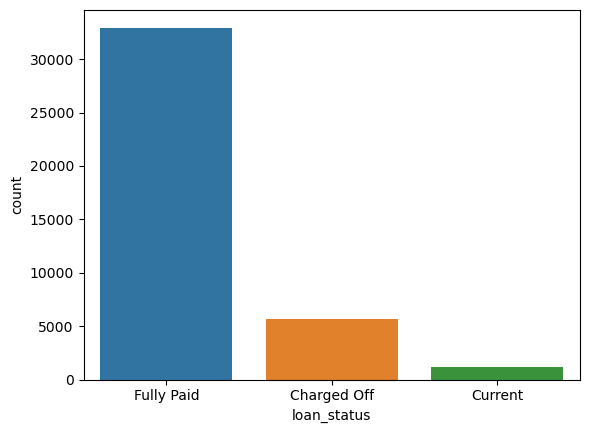

In [18]:
#analysing Loan_status 

sns.countplot(x = 'loan_status', data = loan_ip)

In [19]:
#as status 'current' is of no importance for our analysis, rows with this status should be filtered out 

loan_ip=loan_ip[loan_ip['loan_status']!="Current"]

In [21]:
#check no of rows in the cleaned dataframe
loan_ip.shape

(38577, 21)

In [22]:
#checking for missing values in columns 

round(loan_ip.isnull().sum()/len(loan_ip.index), 2)*100

loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  6.0
emp_length                 3.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
desc                      32.0
purpose                    0.0
title                      0.0
dti                        0.0
mths_since_last_delinq    65.0
pub_rec_bankruptcies       2.0
dtype: float64

Variable émp_length'is of importance for the analysis. First it will be converted to numeric value and missing rows will be imputed with the mode of the variable

In [23]:
#convert 'emp_length' to numeric 

loan_ip["emp_length"] = loan_ip["emp_length"].str.extract("(\d*\.?\d+)", expand=True)

In [36]:
loan_ip["emp_length"] 

0         10
1          1
2         10
3         10
5          3
6          8
7          9
8          4
9          1
10         5
11        10
12         1
13         3
14         3
15         1
16         4
17        10
18         1
19         6
20         3
21        10
22        10
23         5
24         1
25         2
26         9
27         2
28        10
29         1
30         7
31         5
33         2
34         7
35        10
36         2
37         1
38         1
40         4
41        10
42         9
43        10
44        10
45         6
46        10
47         6
48        10
49         5
50         8
51         9
52         1
53         4
54         1
55         7
56         7
57         1
58         2
59         1
60         1
61         6
62         1
63         1
64        10
65         7
66         5
67         4
68         4
69         2
70         5
71         5
72         1
73         3
74         1
75        10
76        10
77         1
78         1
79        10

In [24]:
#calculating mode of the column
loan_ip["emp_length"].mode() 

0    10
Name: emp_length, dtype: object

In [25]:
#replacing missing values with mode value

loan_ip['emp_length'] = loan_ip['emp_length'].fillna("10")

Column 'int_rate' will also be important for the analysis. The % will be dropped from the values and converted to numeric

In [26]:
#removing % and converting it to numeric

loan_ip["int_rate"]=loan_ip["int_rate"].str.replace("%","")

loan_ip["int_rate"]= pd.to_numeric(loan_ip["int_rate"])

In [27]:
#check the values of int_rate

loan_ip["int_rate"].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

Column 'Loan Status' has text values. For our analysis , we will convert them into numeric by assigning values 1 for 'Charged Off' and 0 for 'Fully Paid'

In [28]:
#assigning 1 and 0 
loan_ip['loan_status'] = loan_ip['loan_status'].replace(['Charged Off'],1)
loan_ip['loan_status'] = loan_ip['loan_status'].replace(['Fully Paid'],0)

loan_ip["loan_status"]= pd.to_numeric(loan_ip["loan_status"])

In [29]:
#check the unique values of column 'loan_status'

loan_ip['loan_status'].unique()


array([0, 1])

Now we will analyse some important columns to see if any outlier handling is needed? 


/Users/priyankagharpure/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

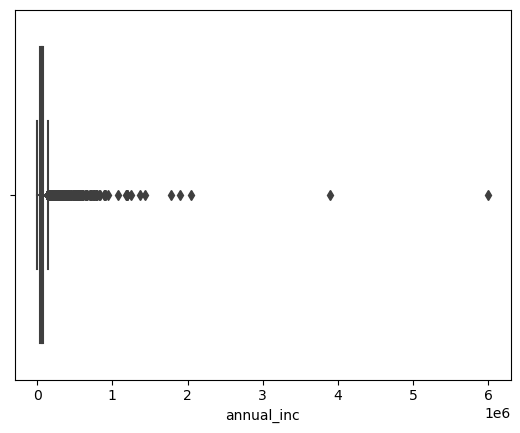

In [30]:
#outlier handling - annual_inc


#analyse values in the column annual_inc
sns.boxplot(loan_ip['annual_inc'])


In [31]:
loan_ip['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [32]:
quantile_info = loan_ip.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info


0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

As values above 95 percentile have outliers, we will rows with values below 95 percentile for our analysis 

In [33]:
#filtering out values above 95 percentile 

loan_ip = loan_ip[loan_ip["annual_inc"] < loan_ip["annual_inc"].quantile(0.95)]

/Users/priyankagharpure/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

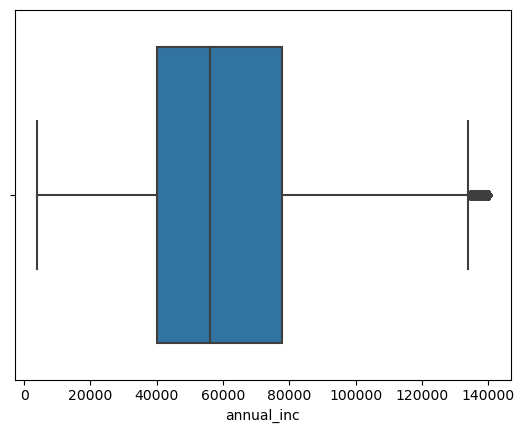

In [83]:
#analysing the values again to see if outliers have been handled 

sns.boxplot(loan_ip['annual_inc'])

Now data distribution looks good. 

Analysing other important to see if any outlier handling is needed?

In [ ]:
Analysing other important to see if any outlier handling is needed

In [34]:
loan_ip.shape

(36642, 21)

/Users/priyankagharpure/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='funded_amnt_inv'>

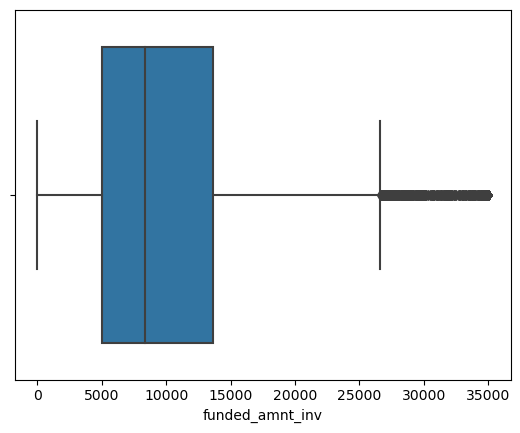

In [35]:
#analysis of funded_amnt_inv

sns.boxplot(loan_ip.funded_amnt_inv)

/Users/priyankagharpure/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dti'>

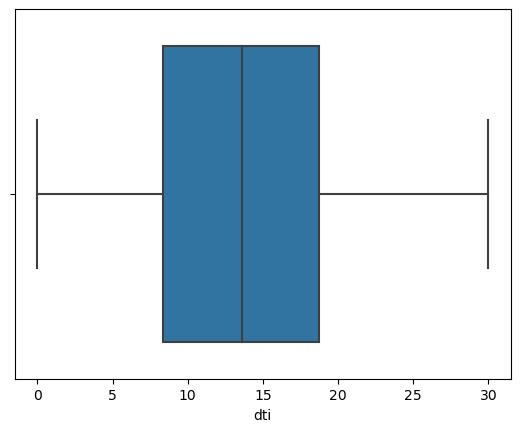

In [36]:
#analysis of dti
sns.boxplot(loan_ip.dti)

Data distribution in both DTI and funded_amnt_inv looks good and doesnt require any correction

Data in column 'Term' has 'months'. This should be removed for further analysis. 

In [37]:
loan_ip['term'] = loan_ip['term'].str[0:3]

In [38]:
loan_ip["term"]= pd.to_numeric(loan_ip["term"])

In [39]:
#verify values in column 'Term' after correction
loan_ip["term"].unique()

array([36, 60])

In [40]:
#check the final cleaned data set
loan_ip.shape

(36642, 21)

After cleaning of data , the dataframe has 21 columns and 36642 rows which will be further used for analysis.


UNIVARIATE ANALYSIS


<AxesSubplot:xlabel='loan_status', ylabel='count'>

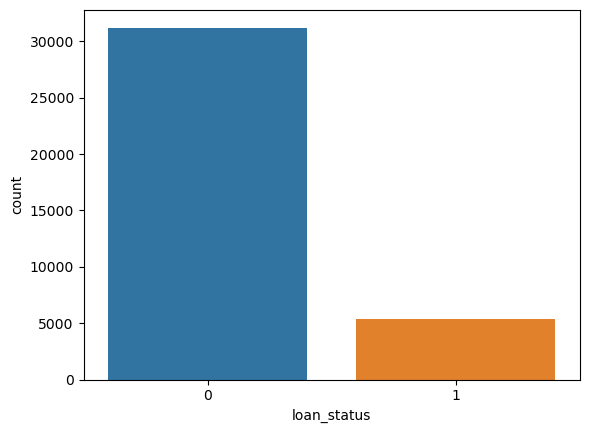

In [50]:
#check overall loan status 
sns.countplot(x = 'loan_status', data = loan_ip)

In [41]:
#checking unique values for home_ownership
loan_ip['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

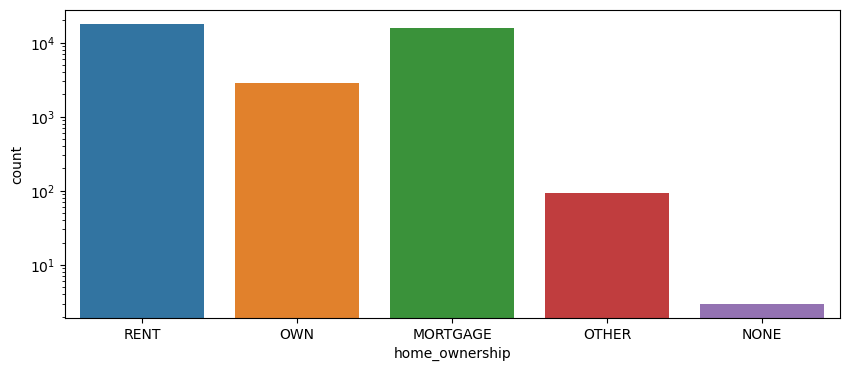

In [42]:
#checking count of each distinct value in home_ownership

fig, ax = plt.subplots(figsize = (10,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership',data=loan_ip)

'NONE' has very negligible no. of records. For analysis purposes, it can be replaced with OTHER

In [43]:
#replacing 'NONE' with 'OTHERS'
loan_ip['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

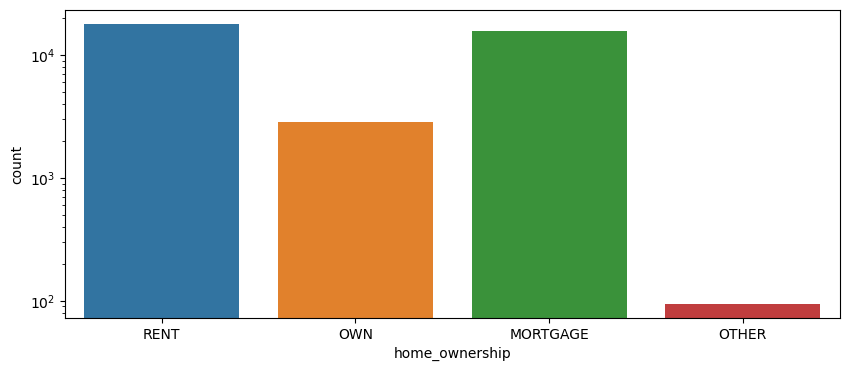

In [54]:
#checking count of each distinct value in home_ownership after cleaning

fig, ax = plt.subplots(figsize = (10,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership',data=loan_ip)

As we have to do analysis of default % across various variables, we will create a function that can be called for further analysis

In [44]:
# defining a function to plot loan_status across various categorical variables for analysis
def plot_status(var):
    sns.barplot(x=var, y='loan_status', data=loan_ip)
    plt.show()

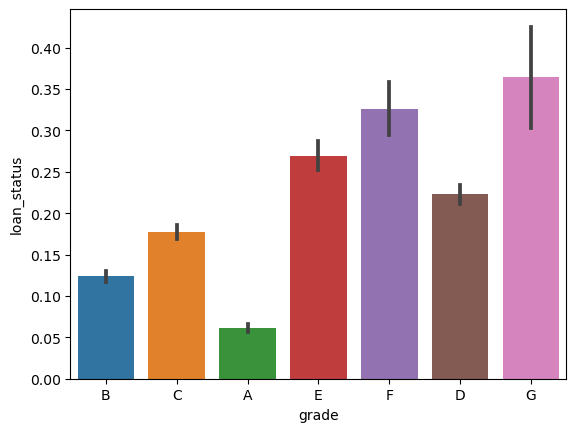

In [56]:
#Default % VS grade analysis

plot_status("grade")

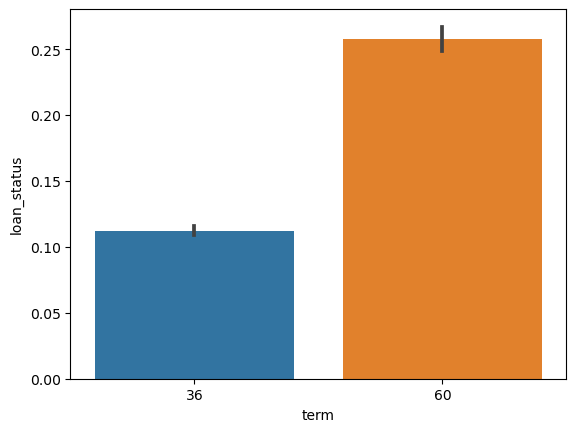

In [45]:
#Default % vs term analysis 

plot_status('term')


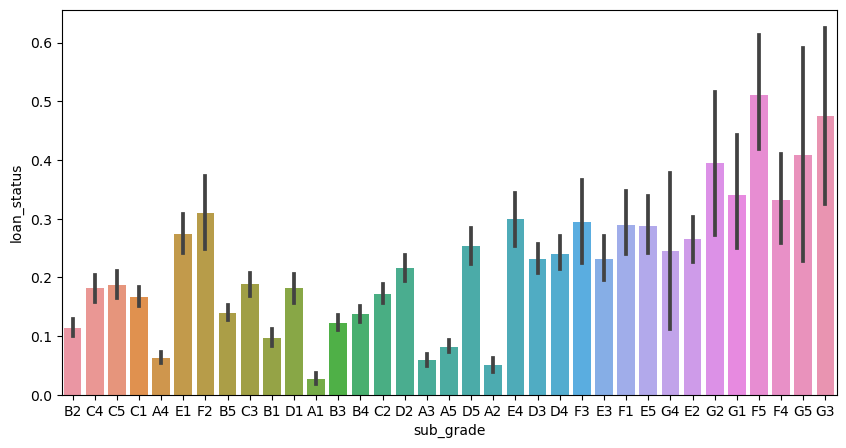

In [46]:
#Default % vs sub-grade: not a deciding factor as all the values are quite close 
plt.figure(figsize=(10, 5))
plot_status('sub_grade')


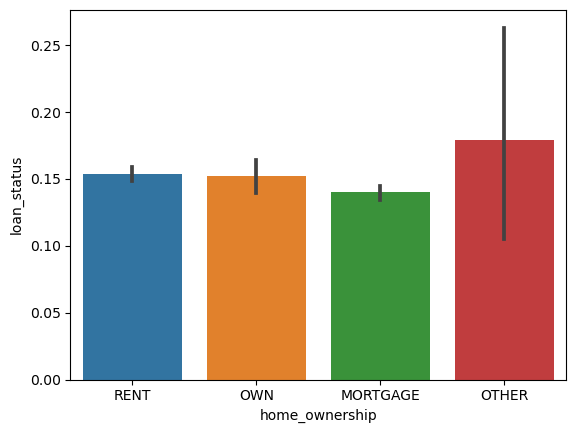

In [47]:
# home ownership: all values close , not a great discriminator
plot_status('home_ownership')

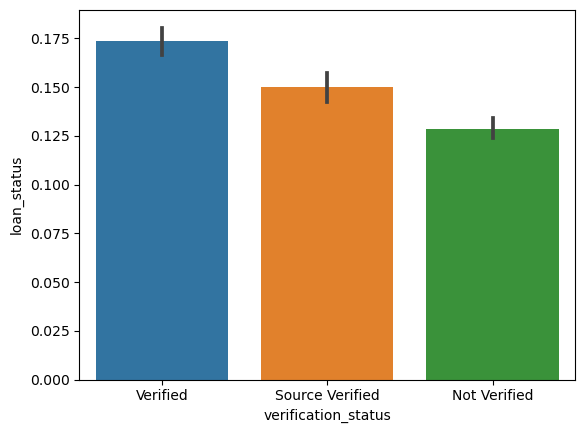

In [48]:
# verification_status: surprisingly, verified loans default more than not verified
plot_status('verification_status')

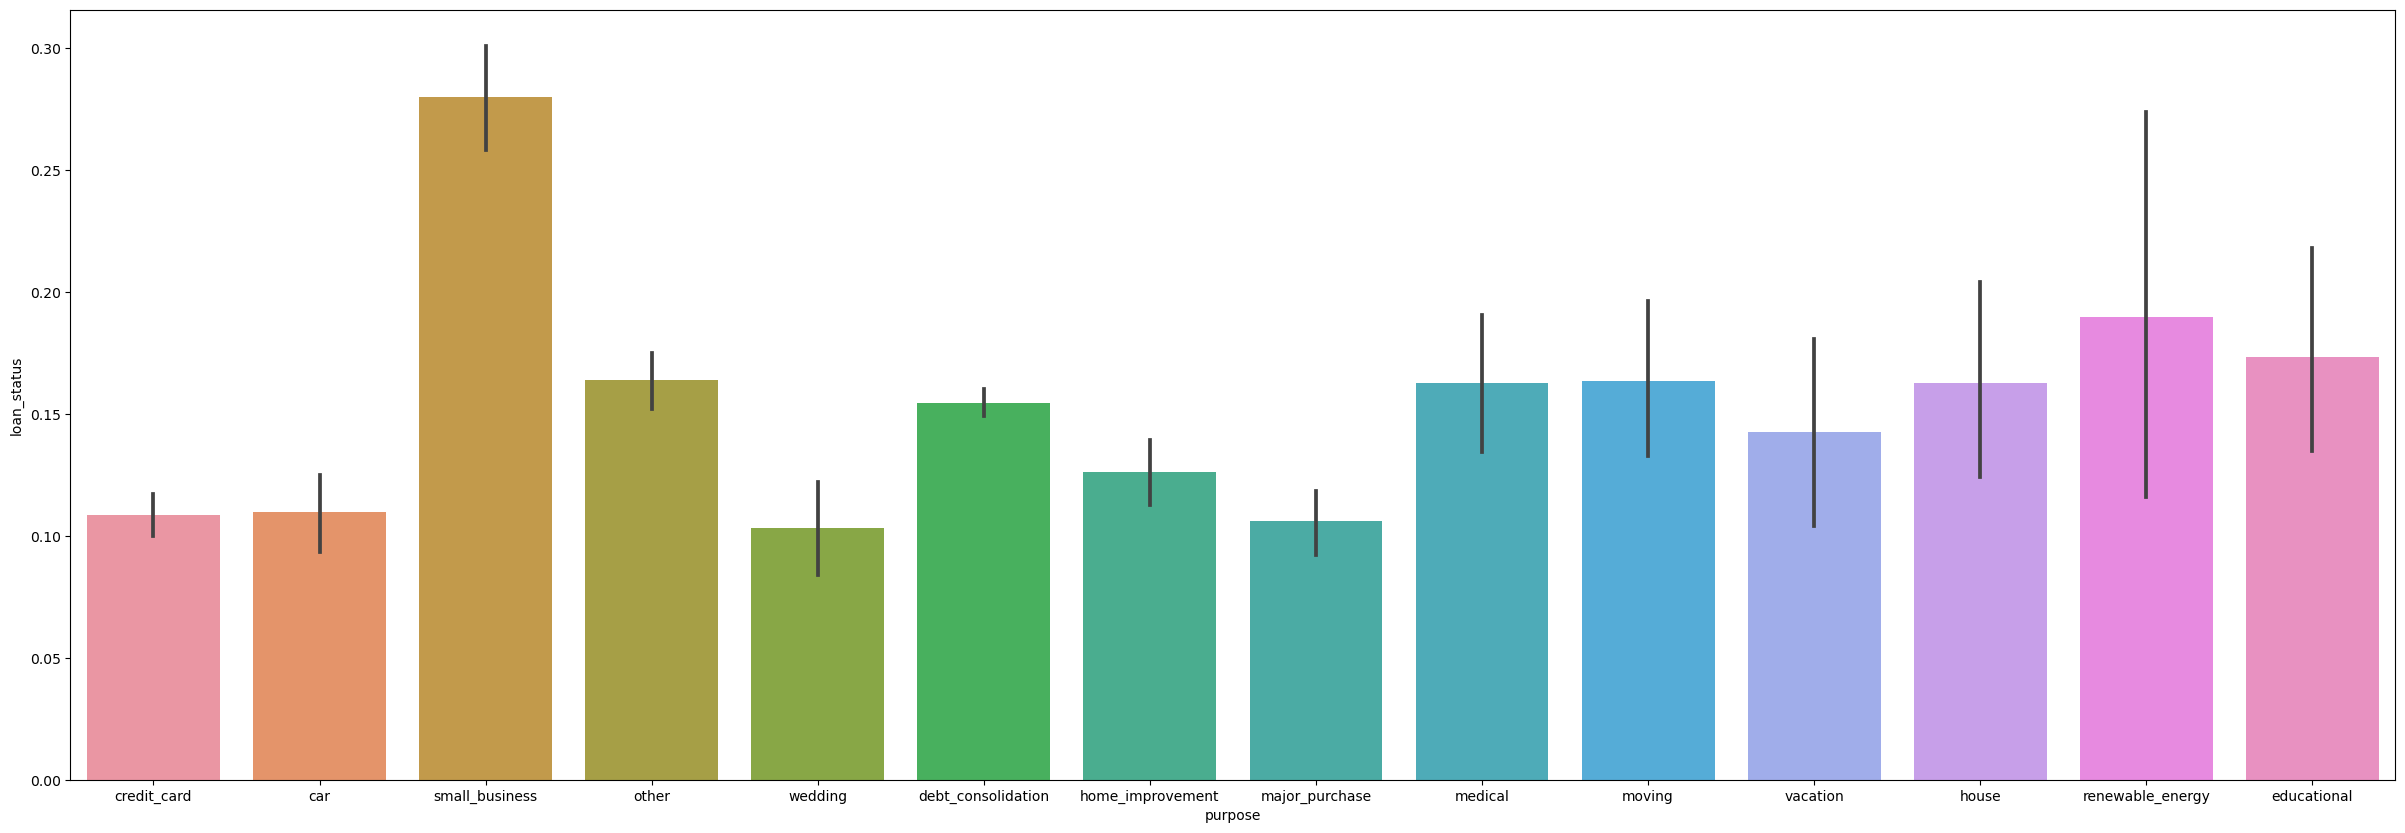

In [49]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(30, 10))
plot_status('purpose')


In [50]:
# checking the distribution of loans across years
# convert the year column into datetime and then extract year and month from it
loan_ip['issue_d'].head()


0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [51]:
from datetime import datetime
loan_ip['issue_d'] = loan_ip['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

loan_ip['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [52]:
# extracting month and year from issue_date
loan_ip['month'] = loan_ip['issue_d'].apply(lambda x: x.month)
loan_ip['year'] = loan_ip['issue_d'].apply(lambda x: x.year)

In [53]:
# check number of loans granted across years
loan_ip.groupby('year').year.count()

year
2007      230
2008     1489
2009     4475
2010    11007
2011    19441
Name: year, dtype: int64

In [54]:
# number of loans across months
loan_ip.groupby('month').month.count()


month
1     2267
2     2251
3     2551
4     2712
5     2788
6     3008
7     3193
8     3214
9     3287
10    3532
11    3820
12    4019
Name: month, dtype: int64

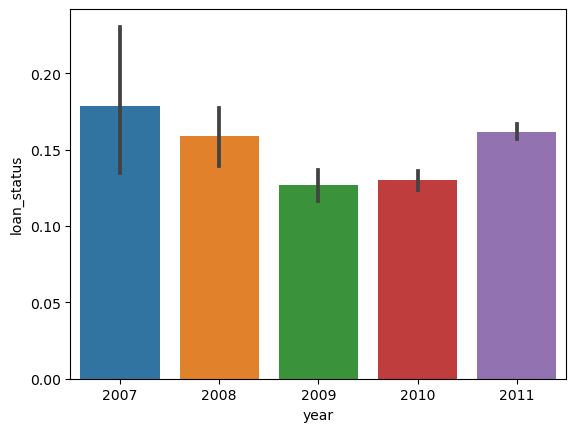

In [55]:
# default rates across years
# the default rate was highest in 2007 and increased in 2011, inspite of reducing from 2008 till 2010
plot_status('year')


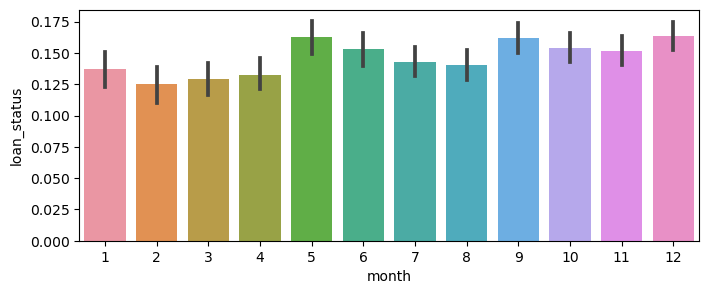

In [59]:
# default rates across months: not much variation across months
plt.figure(figsize=(8, 3))
plot_status('month')


There are some continous variables which are of importance for our univariate and bivariate analysis. We will convert them into categorical values using binning.

In [60]:
#binning funded_amnt_inv

loan_ip["funded_amnt_inv"].describe()

def funded_amnt_inv(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'

In [61]:
loan_ip['funded_amnt_inv'] = loan_ip['funded_amnt_inv'].apply(lambda x: funded_amnt_inv(x))

In [62]:
loan_ip['funded_amnt_inv'].value_counts()

medium       20269
low           9225
high          6088
very high     1060
Name: funded_amnt_inv, dtype: int64

In [63]:
loan_ip['funded_amnt_inv'].head()

0       low
1       low
2       low
3    medium
5    medium
Name: funded_amnt_inv, dtype: object

In [64]:
# binning interest rate to low, medium, high  


loan_ip["int_rate"].describe()


def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    

In [65]:
loan_ip['int_rate'] = loan_ip['int_rate'].apply(lambda x: int_rate(x))

In [66]:
loan_ip["int_rate"].head()

0    medium
1      high
2      high
3    medium
5       low
Name: int_rate, dtype: object

In [67]:
# binning debt to income ratio


loan_ip["dti"].describe()

def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'

In [68]:
loan_ip['dti'] = loan_ip['dti'].apply(lambda x: dti(x))

In [69]:
loan_ip["dti"].head()


0      high
1       low
2       low
3    medium
5    medium
Name: dti, dtype: object

In [70]:
# binning annual income


loan_ip["annual_inc"].describe()

def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

In [71]:
loan_ip['annual_inc'] = loan_ip['annual_inc'].apply(lambda x: annual_income(x))

In [72]:
loan_ip["annual_inc"].head()

0    low
1    low
2    low
3    low
5    low
Name: annual_inc, dtype: object

In [73]:
# binning employment length


loan_ip["emp_length"].describe()

loan_ip["emp_length"].unique()

array(['10', '1', '3', '8', '9', '4', '5', '6', '2', '7'], dtype=object)

In [74]:
#converting variable to numeric 

loan_ip["emp_length"]= pd.to_numeric(loan_ip["emp_length"])

In [75]:
# binning the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

In [76]:
loan_ip['emp_length'] = loan_ip['emp_length'].apply(lambda x: emp_length(x))

In [77]:
loan_ip["emp_length"].unique()

array(['expert', 'fresher', 'junior', 'senior'], dtype=object)

Analysis by binned columns

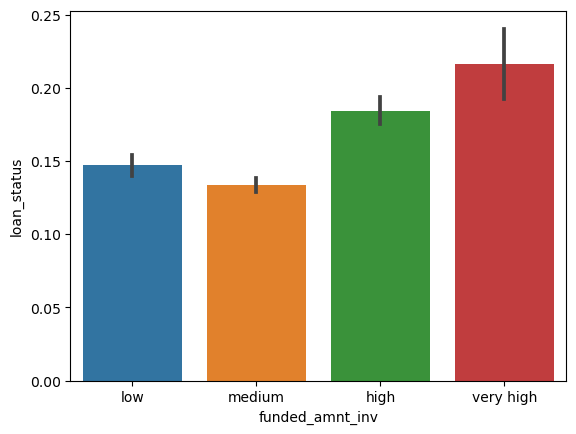

In [130]:
#Default% analysis by funded_amnt_inv
plot_status('funded_amnt_inv')

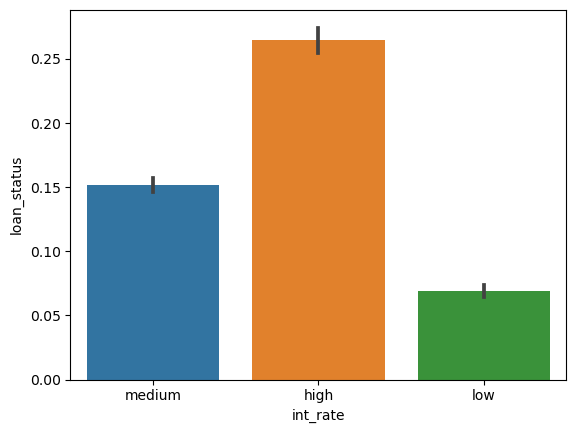

In [131]:
#Default% analysis by int_rate     
plot_status('int_rate')

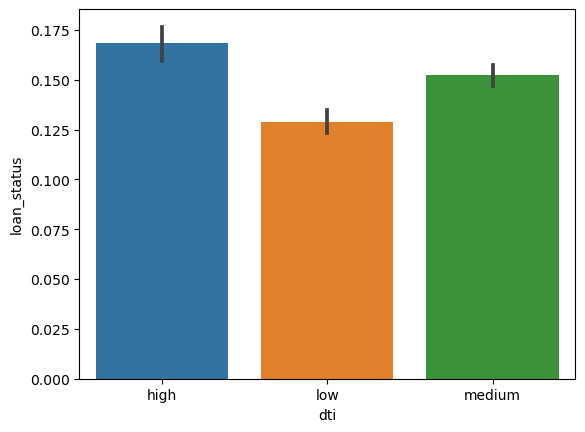

In [132]:
#analysis by dti    
plot_status('dti')

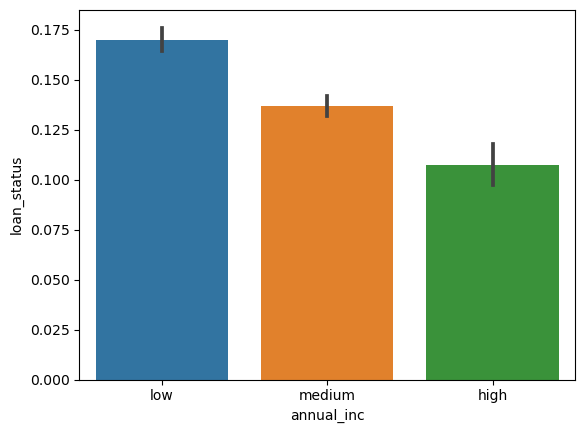

In [133]:
# annual income and default rate
# lower the annual income, higher the default rate
plot_status('annual_inc')


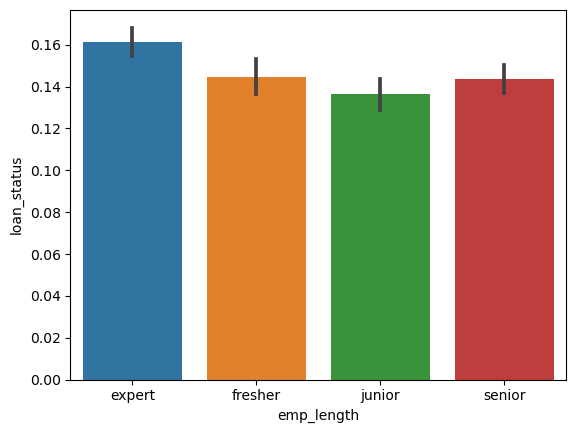

In [134]:
# emp_length and default rate
# not much of a predictor of default
plot_status('emp_length')

BIVARIATE ANALYSIS

In [79]:
#  a function which takes a categorical variable and plots the default rate
# segmented by purpose 

def plot_segmented(cat_var):
    plt.figure(figsize=(20, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=loan_ip)
    plt.show()

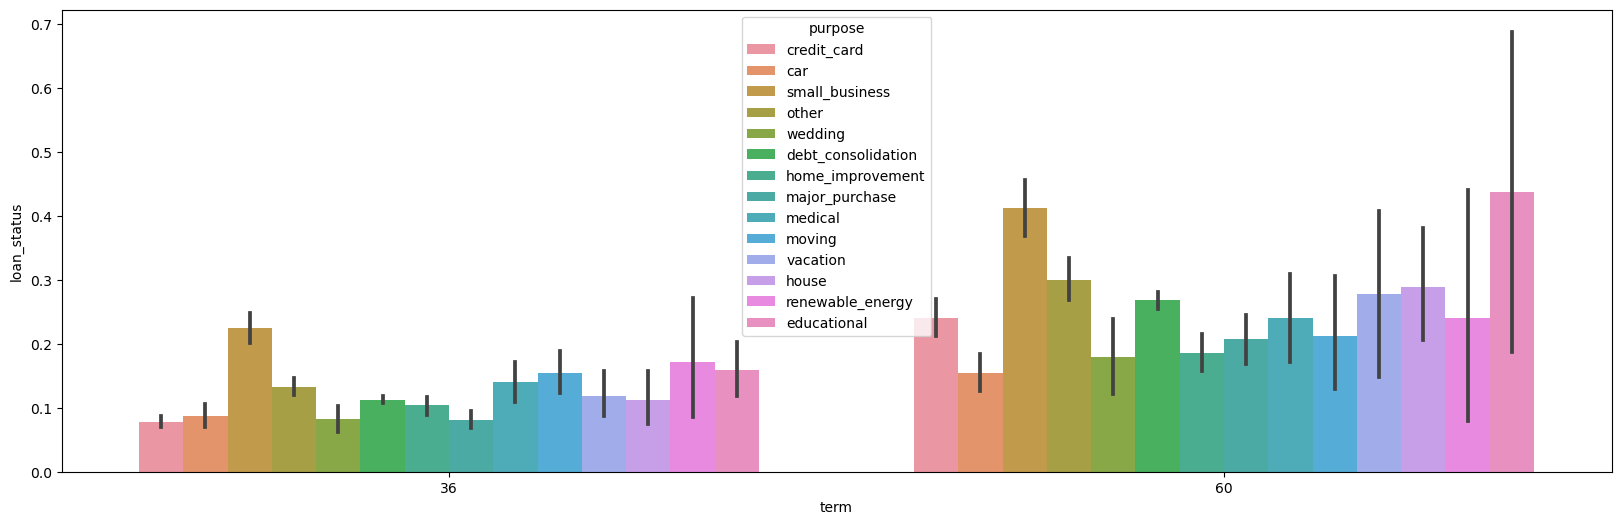

In [137]:
#term analysis

plot_segmented('term')

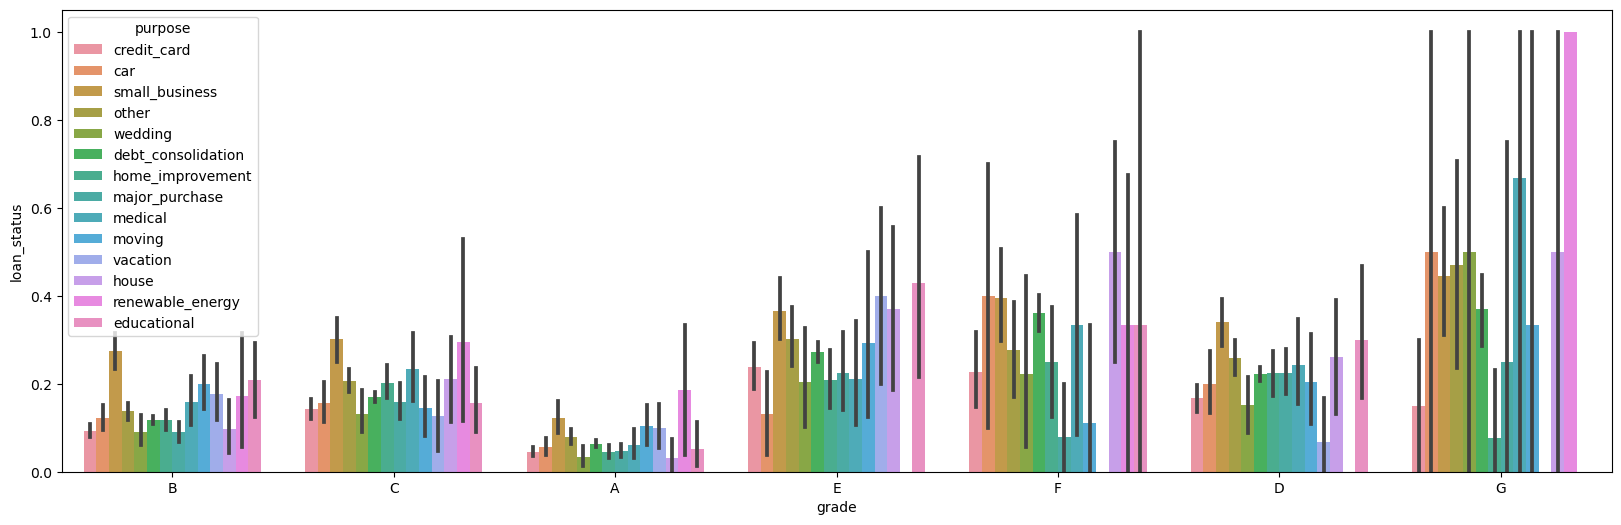

In [138]:
# grade of loan
plot_segmented('grade')


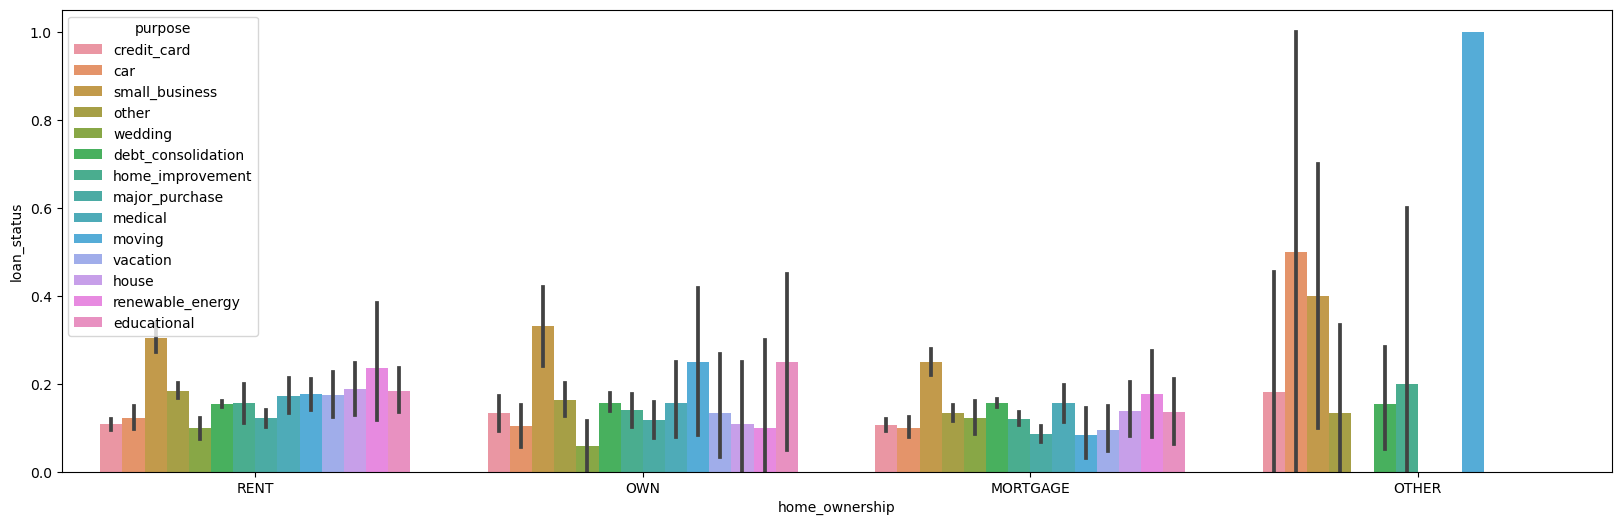

In [139]:
# home ownership
plot_segmented('home_ownership')


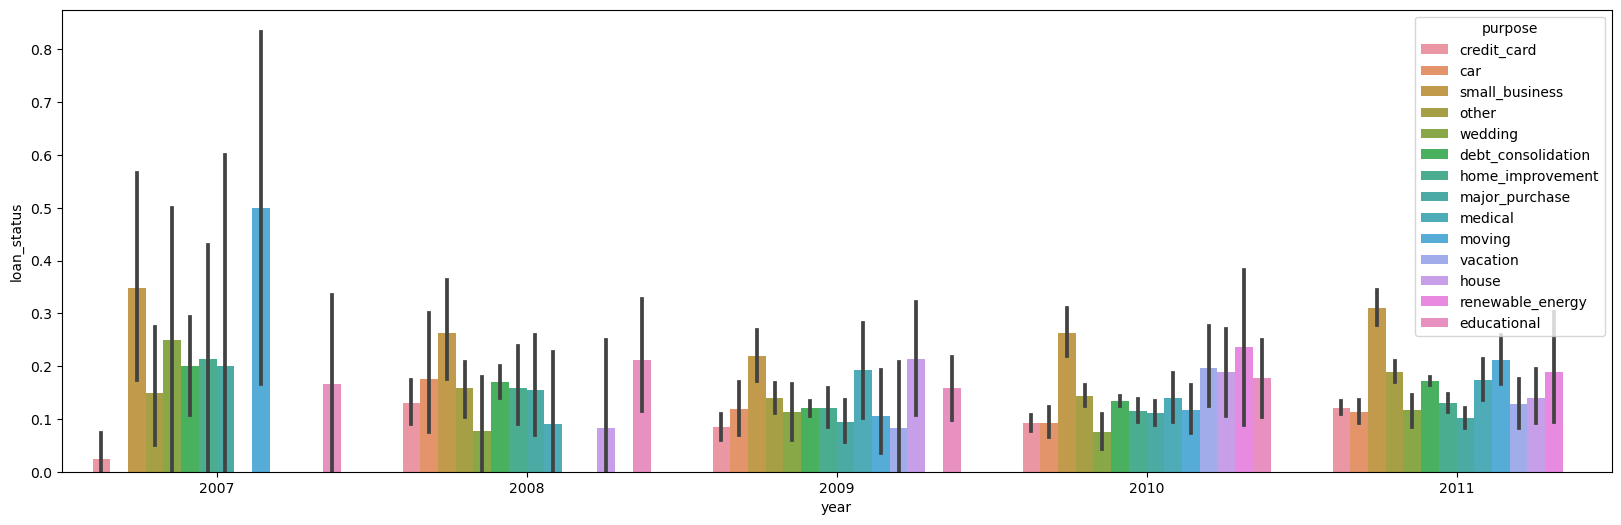

In [140]:
# year
plot_segmented('year')


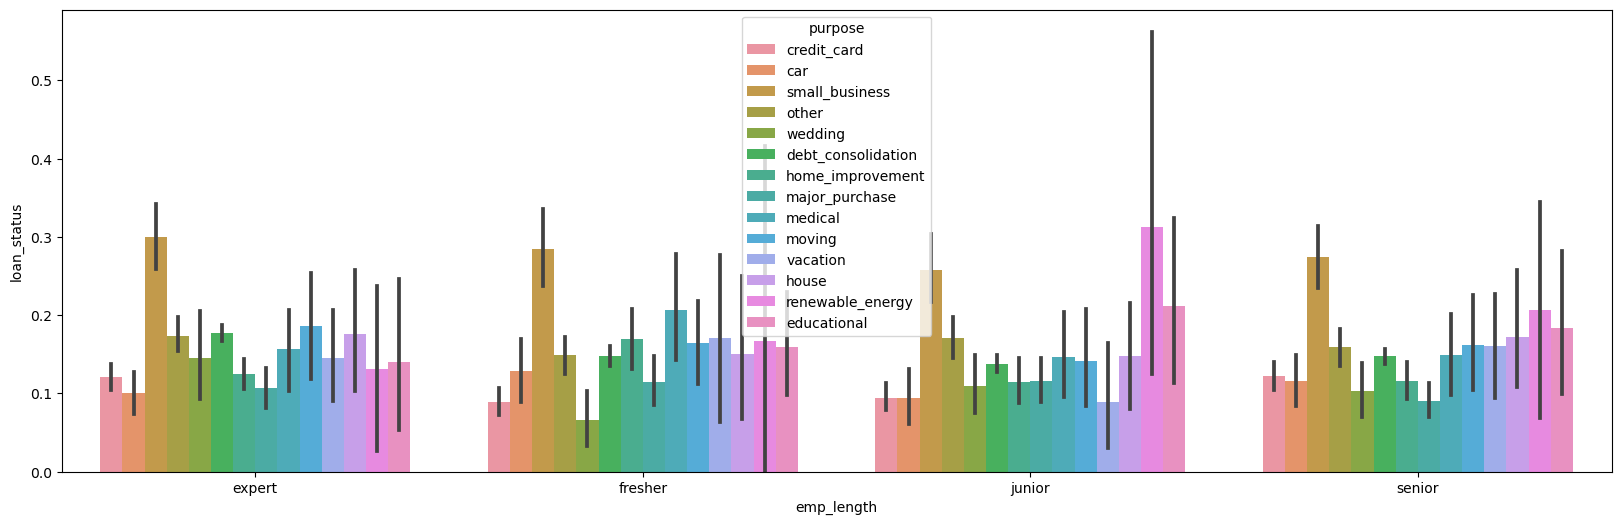

In [141]:
# emp_length
plot_segmented('emp_length')

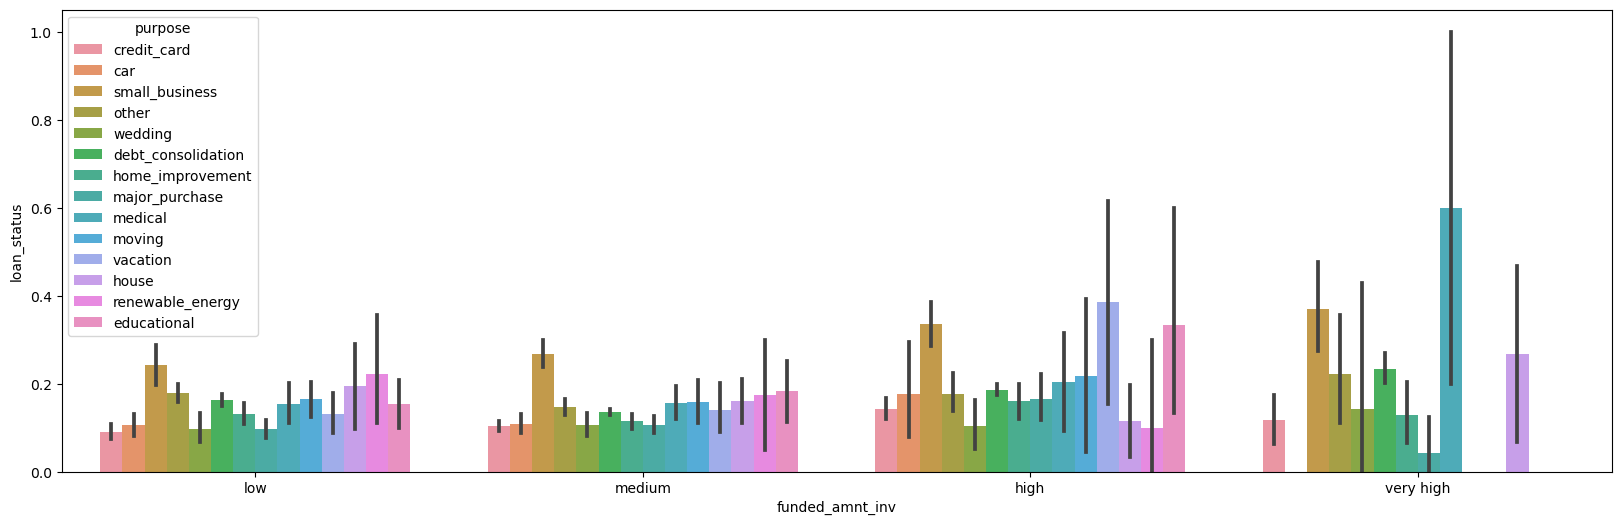

In [144]:
# loan_amnt: same trend across loan purposes
plot_segmented('funded_amnt_inv')

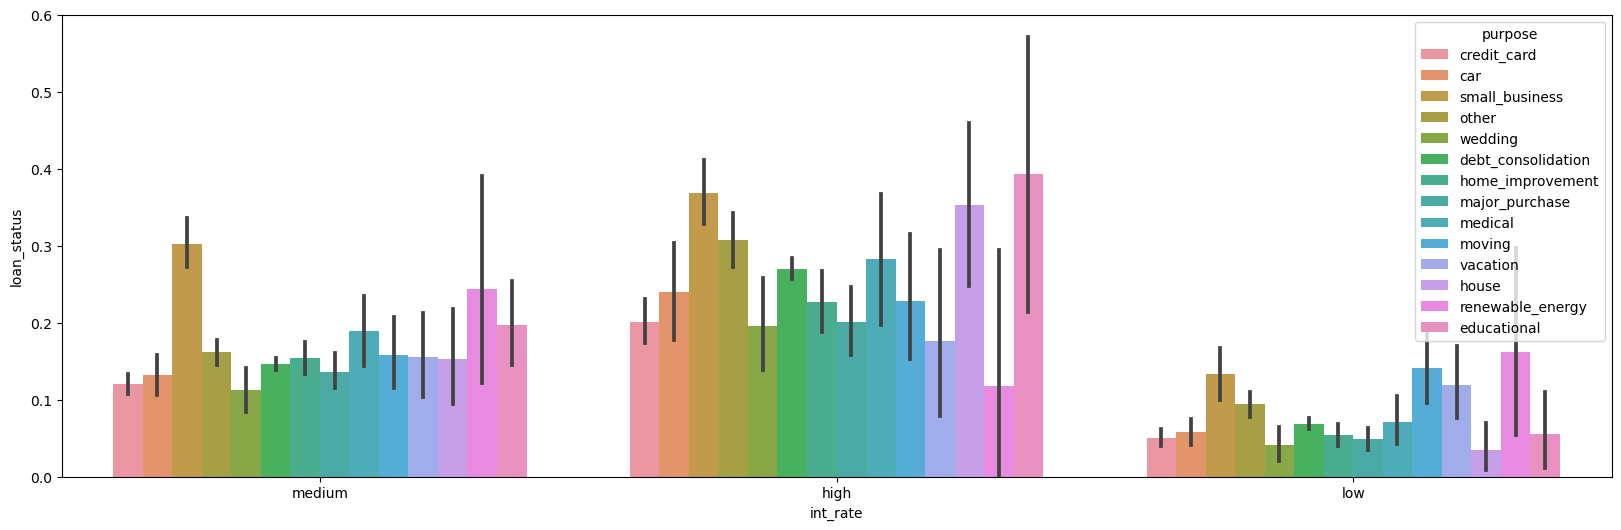

In [80]:
# interest rate
plot_segmented('int_rate')

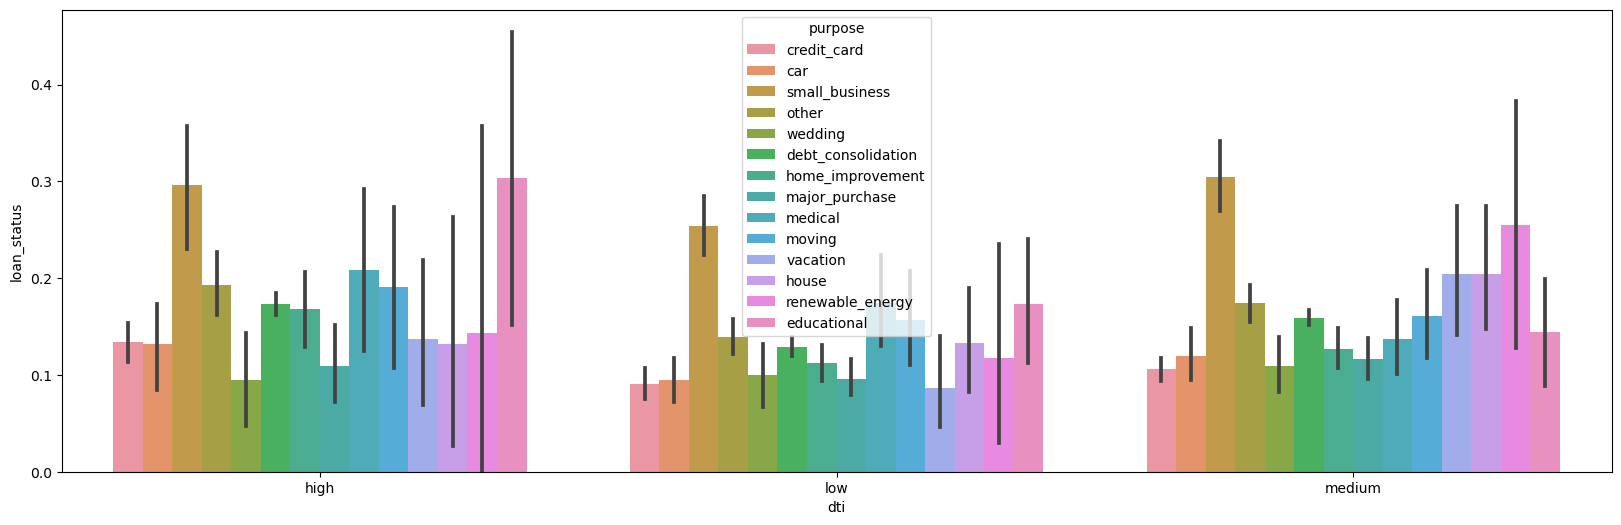

In [81]:
# debt to income ratio
plot_segmented('dti')


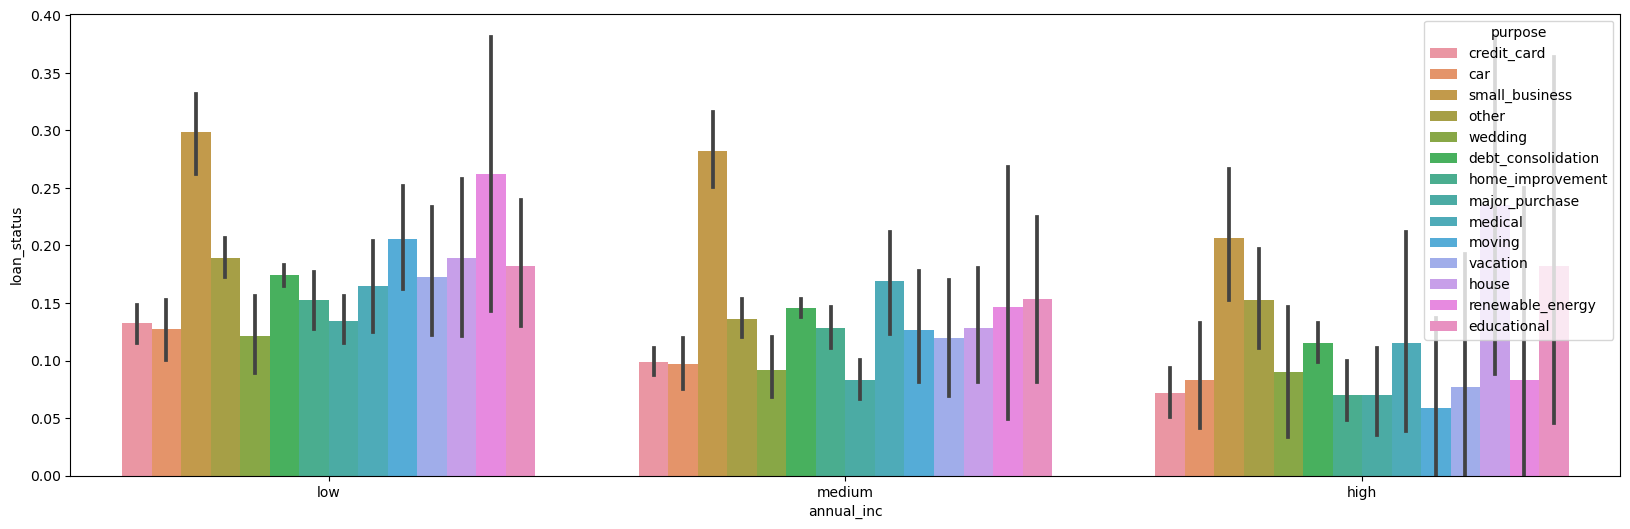

In [82]:
# annual income
plot_segmented('annual_inc')

In [145]:
# variation of default rate across annual_inc
loan_ip.groupby('annual_inc').loan_status.mean().sort_values(ascending=False)

annual_inc
low       0.169797
medium    0.136782
high      0.107445
Name: loan_status, dtype: float64

BIVARIATE ANALYSIS of Continous Variables

In [146]:
#How the funded_amnt_inv is distributed based on default rate?

#creating a function for plotting

def plot_dist(cat_var):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=cat_var, y='loan_status', data=loan_ip)
    plt.show()

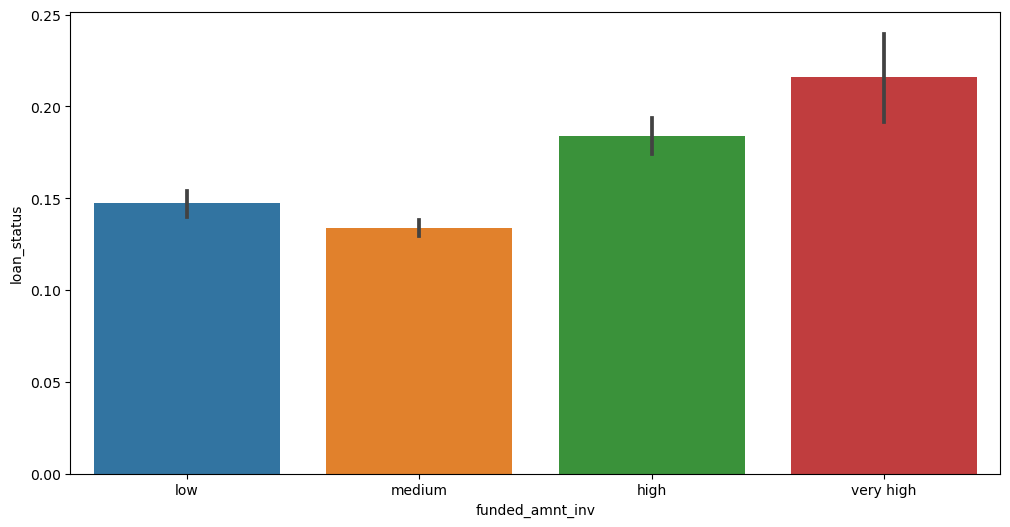

In [147]:
plot_dist('funded_amnt_inv')

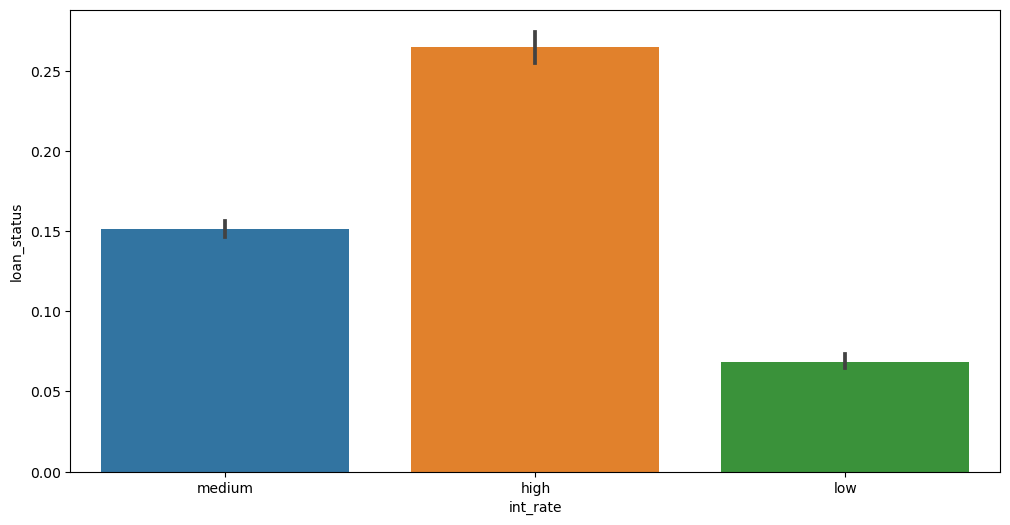

In [148]:
plot_dist('int_rate')


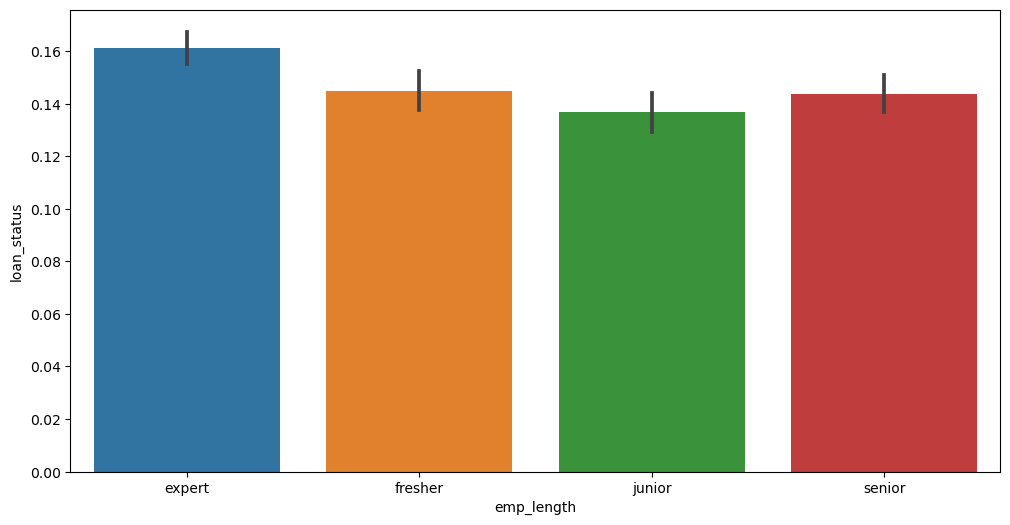

In [149]:
plot_dist('emp_length')

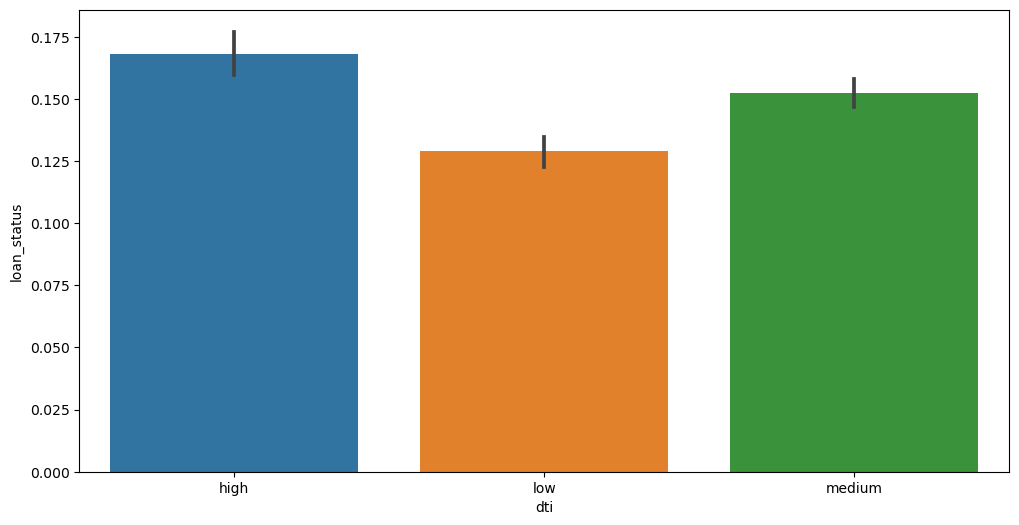

In [150]:
plot_dist('dti')

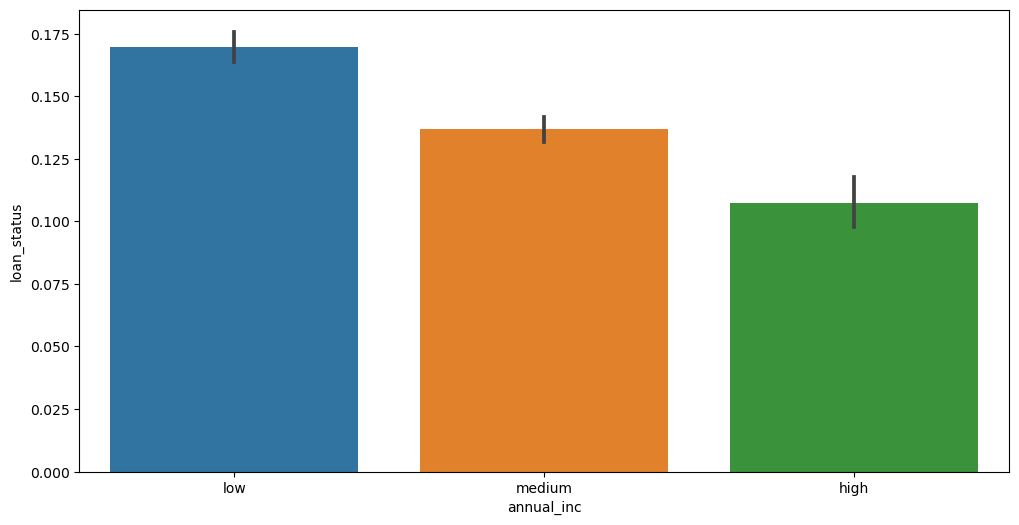

In [151]:
plot_dist('annual_inc')

In [1]:
loan_ip.info()

NameError: name 'loan_ip' is not defined

In [11]:
loan_ip.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'mths_since_last_delinq', 'pub_rec_bankruptcies'],
      dtype='object')

In [83]:
#creating a function to analyse default rate  against int_rate and other variables 

def plot_segmented(cat_var):
    plt.figure(figsize=(20, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='int_rate', data=loan_ip)
    plt.show()

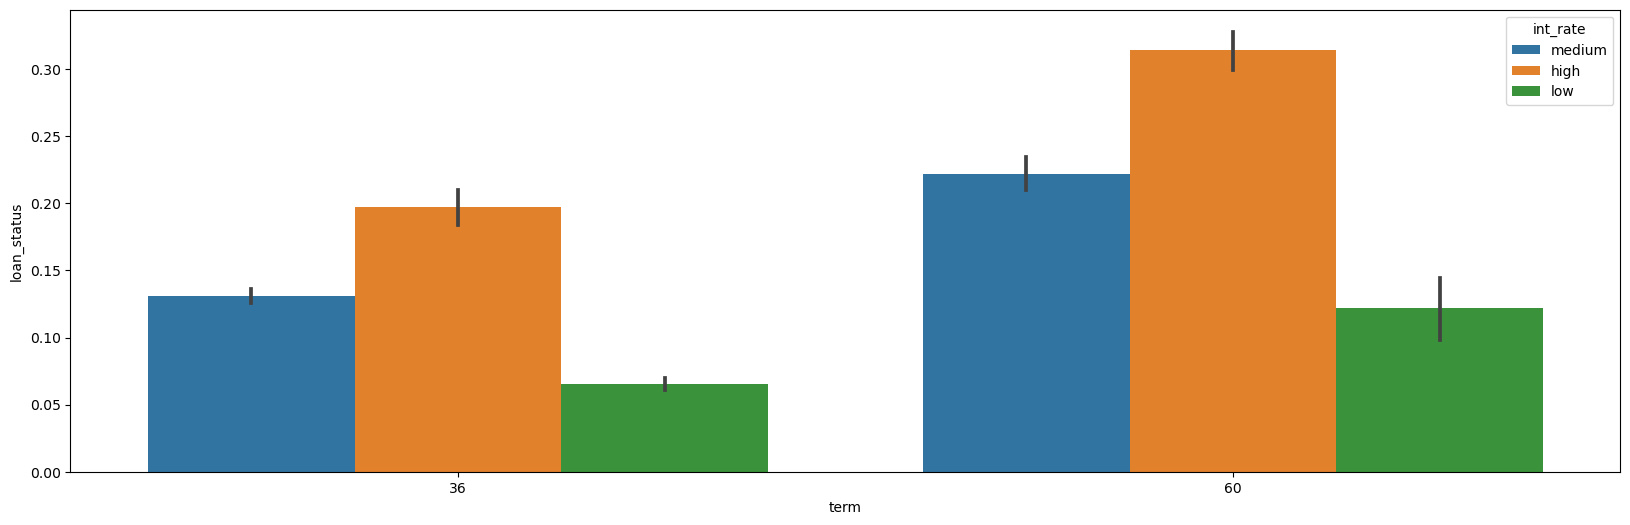

In [84]:
#vs term analysis

plot_segmented('term')

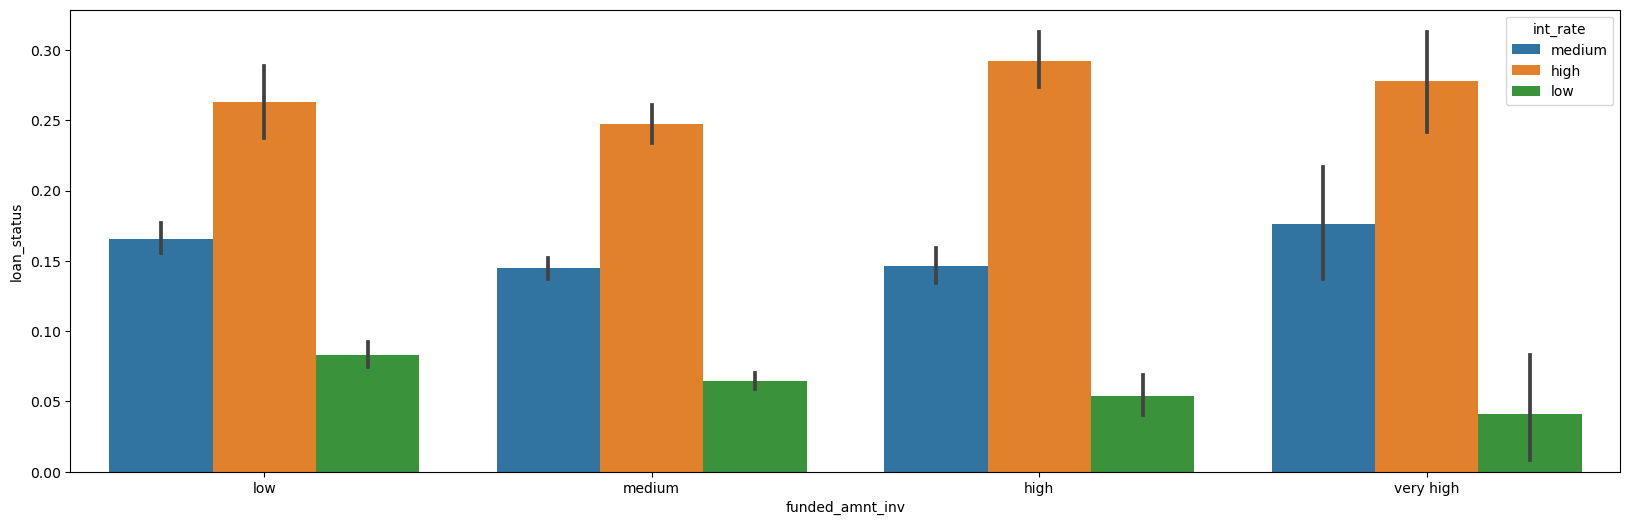

In [85]:
#vs term analysis
plot_segmented('funded_amnt_inv')

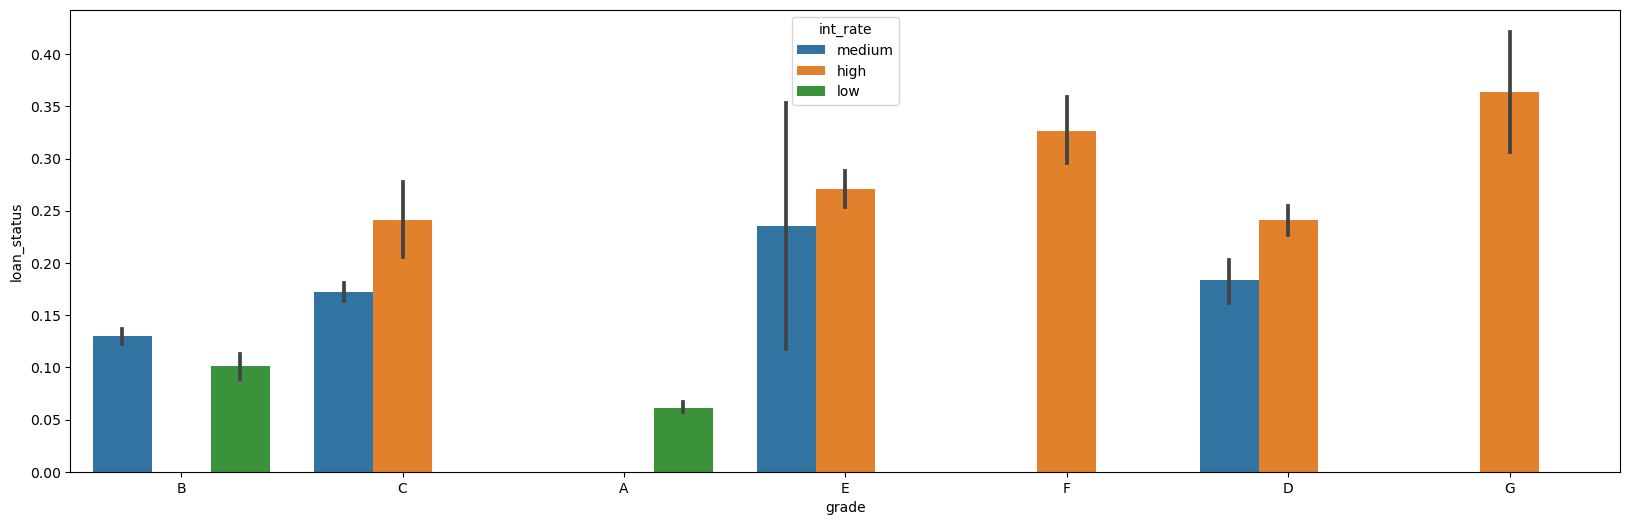

In [86]:
#vs grade analysis
plot_segmented('grade')

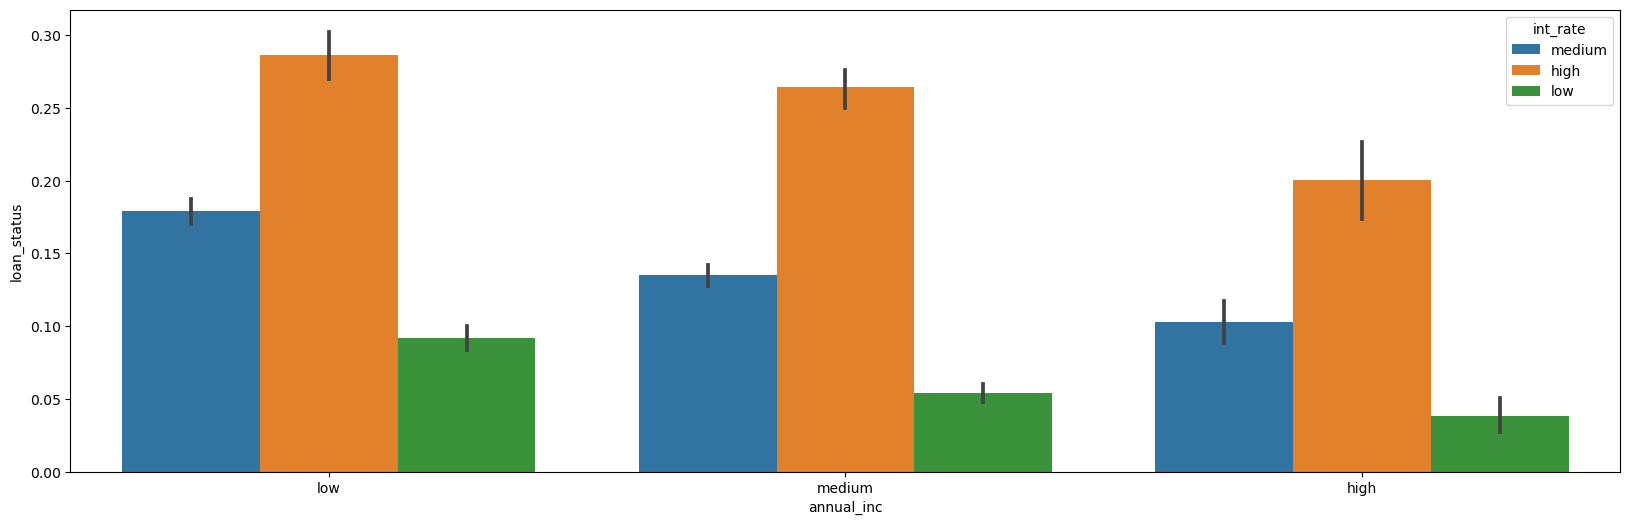

In [87]:
#vs grade analysis
plot_segmented('annual_inc')

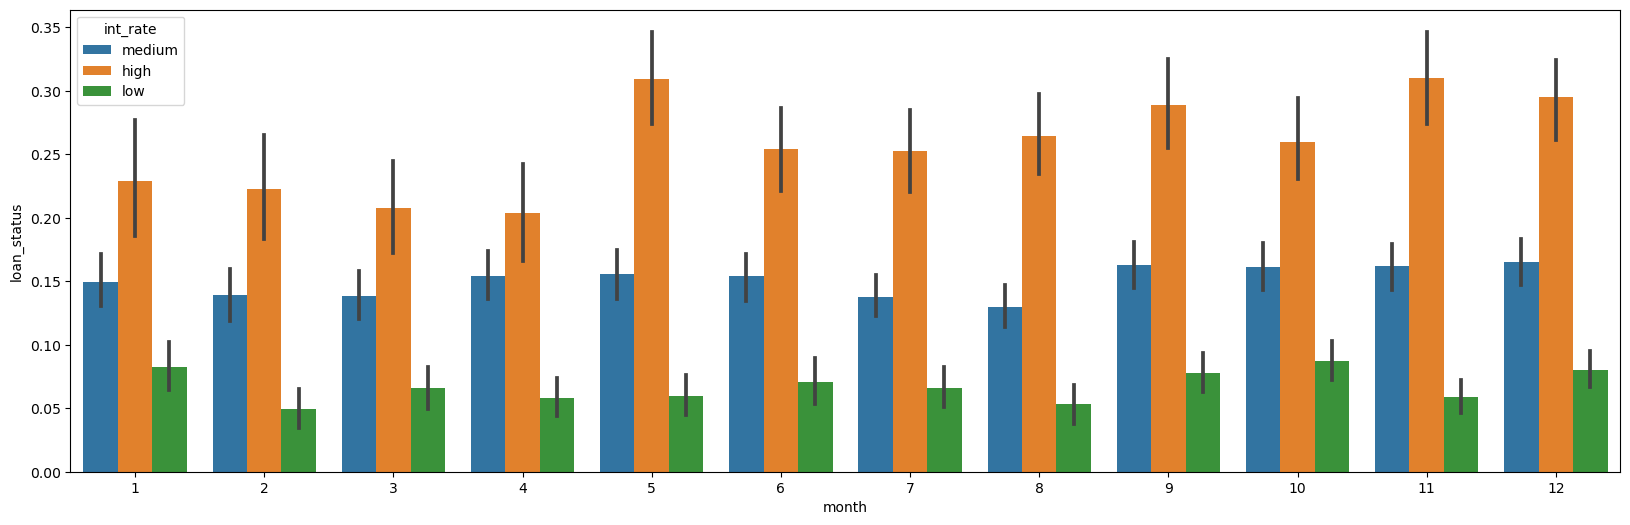

In [88]:
#vs grade analysis
plot_segmented('month')

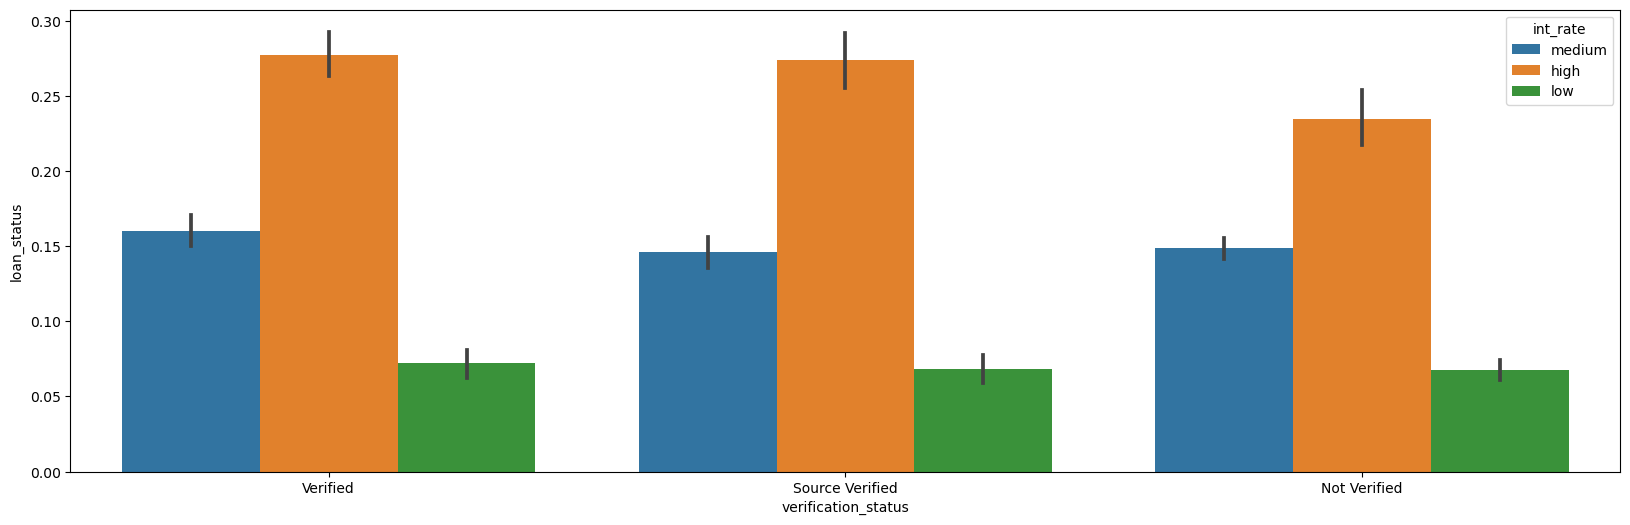

In [89]:
#vs grade analysis
plot_segmented('verification_status')

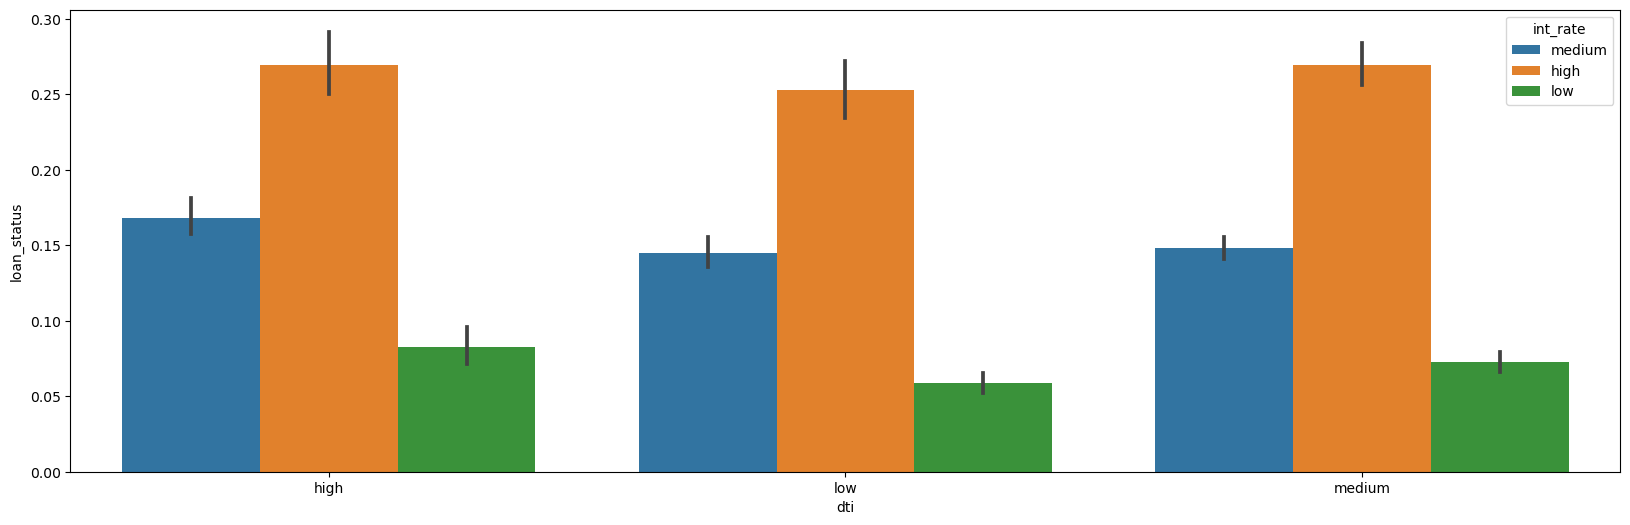

In [90]:
#vs grade analysis
plot_segmented('dti')